# Importing Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# Load Training Dataset

In [2]:
main_data = pd.read_excel("C://Users//bhanu//Documents//summer intern//time_series_375_preprocess_en.xlsx")  #training data
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 81 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   PATIENT_ID                                                     375 non-null    float64       
 1   RE_DATE                                                        6106 non-null   datetime64[ns]
 2   age                                                            6120 non-null   int64         
 3   gender                                                         6120 non-null   int64         
 4   Admission time                                                 6120 non-null   datetime64[ns]
 5   Discharge time                                                 6120 non-null   datetime64[ns]
 6   outcome                                                        6120 non-null   int64         
 7

In [3]:
check = main_data
d = main_data
# len(check['hemoglobin'].notnull())
check = check.count(axis = 1)
l = []
req = []
c = 0
for i in check.iteritems():
    l.append(i[1])
check
cnt = 0
for i,v in enumerate(l):
    if(v>29):
        cnt += 1
    else:
        req.append(i)
        
        
print(cnt)
d = d.drop(req)
d

1049


PATIENT_ID             RE_DATE  age  gender      Admission time  \
1            NaN 2020-01-31 01:25:00   73       1 2020-01-30 22:12:47   
9            NaN 2020-02-06 09:14:00   73       1 2020-01-30 22:12:47   
10           NaN 2020-02-06 10:06:00   73       1 2020-01-30 22:12:47   
11           NaN 2020-02-10 12:42:00   73       1 2020-01-30 22:12:47   
14           NaN 2020-02-15 09:58:00   73       1 2020-01-30 22:12:47   
...          ...                 ...  ...     ...                 ...   
6066         NaN 2020-02-13 07:26:00   79       1 2020-02-05 17:52:06   
6069         NaN 2020-02-14 07:06:00   79       1 2020-02-05 17:52:06   
6076         NaN 2020-02-15 08:05:00   79       1 2020-02-05 17:52:06   
6077       373.0 2020-02-12 10:18:00   61       2 2020-02-12 03:07:48   
6097         NaN 2020-02-09 12:38:00   68       1 2020-02-08 23:25:01   

          Discharge time  outcome  Hypersensitive cardiac troponinI  \
1    2020-02-17 12:40:09        0                               NaN   
9    2020-02-17 12:40:09        0                               NaN   
10   2020-02-17 12:40:09        0                               NaN   
11   2020-02-17 12:40:09        0                               NaN   
14   2020-02-17 12:40:09        0                               NaN   
...                  ...      ...                               ...   
6066 2020-02-16 10:45:40        1                               NaN   
6069 2020-02-16 10:45:40        1                               NaN   
6076 2020-02-16 10:45:40        1                               NaN   
6077 2020-02-14 18:47:23        1                               NaN   
6097 2020-02-19 01:31:58        1                               NaN   

      hemoglobin  Serum chloride  ...  mean corpuscular hemoglobin   \
1          136.0             NaN  ...                          31.9   
9          140.0             NaN  ...                          32.1   
10           NaN           101.4  ...                           NaN   
11         130.0             NaN  ...                          31.7   
14         129.0             NaN  ...                          32.6   
...          ...             ...  ...                           ...   
6066       120.0             NaN  ...                          29.6   
6069       106.0             NaN  ...                          29.7   
6076       102.0             NaN  ...                          30.4   
6077       100.0             NaN  ...                          27.6   
6097       171.0             NaN  ...                          31.5   

      Activation of partial thromboplastin time  \
1                                           NaN   
9                                           NaN   
10                                          NaN   
11                                          NaN   
14                                          NaN   
...                                         ...   
6066                                        NaN   
6069                                        NaN   
6076                                        NaN   
6077                                        NaN   
6097                                        NaN   

      High sensitivity C-reactive protein  HIV antibody quantification  \
1                                     NaN                          NaN   
9                                     NaN                          NaN   
10                                    3.6                          NaN   
11                                    NaN                          NaN   
14                                    NaN                          NaN   
...                                   ...                          ...   
6066                                  NaN                          NaN   
6069                                  NaN                          NaN   
6076                                  NaN                          NaN   
6077                                  NaN                          NaN

# Training Data

In [4]:
main_data.head()

PATIENT_ID             RE_DATE  age  gender      Admission time  \
0         1.0 2020-01-31 01:09:00   73       1 2020-01-30 22:12:47   
1         NaN 2020-01-31 01:25:00   73       1 2020-01-30 22:12:47   
2         NaN 2020-01-31 01:44:00   73       1 2020-01-30 22:12:47   
3         NaN 2020-01-31 01:45:00   73       1 2020-01-30 22:12:47   
4         NaN 2020-01-31 01:56:00   73       1 2020-01-30 22:12:47   

       Discharge time  outcome  Hypersensitive cardiac troponinI  hemoglobin  \
0 2020-02-17 12:40:09        0                               NaN         NaN   
1 2020-02-17 12:40:09        0                               NaN       136.0   
2 2020-02-17 12:40:09        0                               NaN         NaN   
3 2020-02-17 12:40:09        0                               NaN         NaN   
4 2020-02-17 12:40:09        0                              19.9         NaN   

   Serum chloride  ...  mean corpuscular hemoglobin   \
0             NaN  ...                           NaN   
1             NaN  ...                          31.9   
2           103.1  ...                           NaN   
3             NaN  ...                           NaN   
4             NaN  ...                           NaN   

   Activation of partial thromboplastin time  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   High sensitivity C-reactive protein  HIV antibody quantification  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                 43.1                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   

   serum sodium  thrombocytocrit  ESR  glutamic-pyruvic transaminase  eGFR  \
0           NaN              NaN  NaN                            NaN   NaN   
1           NaN             0.12  NaN                            NaN   NaN   
2         137.7              NaN  NaN                           16.0  46.6   
3           NaN              NaN  NaN                            NaN   NaN   
4           NaN              NaN  NaN                            NaN   NaN   

   creatinine  
0         NaN  
1         NaN  
2       130.0  
3         NaN  
4         NaN  

[5 rows x 81 columns]

# Training Data Pre-processing

In [5]:
# In the data, one patient has different set of values - rows. but we can see that 
# only the first row has the patient ID and the rest of the cases have NaN as the value.
# All the rows should have the same patient id. we are recognising this with the help of admission
# date as the admission date will not change for different cases. to fill Nan values we use the preceding values.
main_data['PATIENT_ID'] = [i for i in range(1,len(main_data)+1)]
main_data

PATIENT_ID             RE_DATE  age  gender      Admission time  \
0              1 2020-01-31 01:09:00   73       1 2020-01-30 22:12:47   
1              2 2020-01-31 01:25:00   73       1 2020-01-30 22:12:47   
2              3 2020-01-31 01:44:00   73       1 2020-01-30 22:12:47   
3              4 2020-01-31 01:45:00   73       1 2020-01-30 22:12:47   
4              5 2020-01-31 01:56:00   73       1 2020-01-30 22:12:47   
...          ...                 ...  ...     ...                 ...   
6115        6116 2020-02-16 11:21:00   68       1 2020-02-08 23:25:01   
6116        6117 2020-02-16 12:04:00   68       1 2020-02-08 23:25:01   
6117        6118 2020-02-16 12:14:00   68       1 2020-02-08 23:25:01   
6118        6119 2020-02-16 14:11:00   68       1 2020-02-08 23:25:01   
6119        6120 2020-02-16 14:37:00   68       1 2020-02-08 23:25:01   

          Discharge time  outcome  Hypersensitive cardiac troponinI  \
0    2020-02-17 12:40:09        0                               NaN   
1    2020-02-17 12:40:09        0                               NaN   
2    2020-02-17 12:40:09        0                               NaN   
3    2020-02-17 12:40:09        0                               NaN   
4    2020-02-17 12:40:09        0                              19.9   
...                  ...      ...                               ...   
6115 2020-02-19 01:31:58        1                              84.9   
6116 2020-02-19 01:31:58        1                               NaN   
6117 2020-02-19 01:31:58        1                               NaN   
6118 2020-02-19 01:31:58        1                               NaN   
6119 2020-02-19 01:31:58        1                               NaN   

      hemoglobin  Serum chloride  ...  mean corpuscular hemoglobin   \
0            NaN             NaN  ...                           NaN   
1          136.0             NaN  ...                          31.9   
2            NaN           103.1  ...                           NaN   
3            NaN             NaN  ...                           NaN   
4            NaN             NaN  ...                           NaN   
...          ...             ...  ...                           ...   
6115         NaN             NaN  ...                           NaN   
6116         NaN             NaN  ...                           NaN   
6117         NaN           105.2  ...                           NaN   
6118       155.0             NaN  ...                          31.6   
6119         NaN             NaN  ...                           NaN   

      Activation of partial thromboplastin time  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
6115                                        NaN   
6116                                        NaN   
6117                                        NaN   
6118                                        NaN   
6119                                       35.8   

      High sensitivity C-reactive protein  HIV antibody quantification  \
0                                     NaN                          NaN   
1                                     NaN                          NaN   
2                                    43.1                          NaN   
3                                     NaN                          NaN   
4                                     NaN                          NaN   
...                                   ...                          ...   
6115                                  NaN                          NaN   
6116                                  NaN                          NaN   
6117                                267.0                          NaN   
6118                                  NaN                          NaN

# Imputing Missing Values

In [6]:
# As there are different set of values for each patient we are choosing the value which is most recent. 
# to do this we group the patient id and with respect to the admission time and select the last row of each group
data_1 = main_data.sort_values('RE_DATE')
data_1 = data_1.sort_values('PATIENT_ID')
data_1
dup = data_1.fillna(data_1.median())
dup

C:\Users\bhanu\AppData\Local\Temp\ipykernel_27592\88674732.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dup = data_1.fillna(data_1.median())


PATIENT_ID             RE_DATE  age  gender      Admission time  \
0              1 2020-01-31 01:09:00   73       1 2020-01-30 22:12:47   
1              2 2020-01-31 01:25:00   73       1 2020-01-30 22:12:47   
2              3 2020-01-31 01:44:00   73       1 2020-01-30 22:12:47   
3              4 2020-01-31 01:45:00   73       1 2020-01-30 22:12:47   
4              5 2020-01-31 01:56:00   73       1 2020-01-30 22:12:47   
...          ...                 ...  ...     ...                 ...   
6115        6116 2020-02-16 11:21:00   68       1 2020-02-08 23:25:01   
6116        6117 2020-02-16 12:04:00   68       1 2020-02-08 23:25:01   
6117        6118 2020-02-16 12:14:00   68       1 2020-02-08 23:25:01   
6118        6119 2020-02-16 14:11:00   68       1 2020-02-08 23:25:01   
6119        6120 2020-02-16 14:37:00   68       1 2020-02-08 23:25:01   

          Discharge time  outcome  Hypersensitive cardiac troponinI  \
0    2020-02-17 12:40:09        0                              20.6   
1    2020-02-17 12:40:09        0                              20.6   
2    2020-02-17 12:40:09        0                              20.6   
3    2020-02-17 12:40:09        0                              20.6   
4    2020-02-17 12:40:09        0                              19.9   
...                  ...      ...                               ...   
6115 2020-02-19 01:31:58        1                              84.9   
6116 2020-02-19 01:31:58        1                              20.6   
6117 2020-02-19 01:31:58        1                              20.6   
6118 2020-02-19 01:31:58        1                              20.6   
6119 2020-02-19 01:31:58        1                              20.6   

      hemoglobin  Serum chloride  ...  mean corpuscular hemoglobin   \
0          125.0           102.1  ...                          30.9   
1          136.0           102.1  ...                          31.9   
2          125.0           103.1  ...                          30.9   
3          125.0           102.1  ...                          30.9   
4          125.0           102.1  ...                          30.9   
...          ...             ...  ...                           ...   
6115       125.0           102.1  ...                          30.9   
6116       125.0           102.1  ...                          30.9   
6117       125.0           105.2  ...                          30.9   
6118       155.0           102.1  ...                          31.6   
6119       125.0           102.1  ...                          30.9   

      Activation of partial thromboplastin time  \
0                                          39.2   
1                                          39.2   
2                                          39.2   
3                                          39.2   
4                                          39.2   
...                                         ...   
6115                                       39.2   
6116                                       39.2   
6117                                       39.2   
6118                                       39.2   
6119                                       35.8   

      High sensitivity C-reactive protein  HIV antibody quantification  \
0                                    51.5                         0.09   
1                                    51.5                         0.09   
2                                    43.1                         0.09   
3                                    51.5                         0.09   
4                                    51.5                         0.09   
...                                   ...                          ...   
6115                                 51.5                         0.09   
6116                                 51.5                         0.09   
6117                                267.0                         0.09   
6118                                 51.5                         0.09

# Visualization of Training Data

<AxesSubplot:>

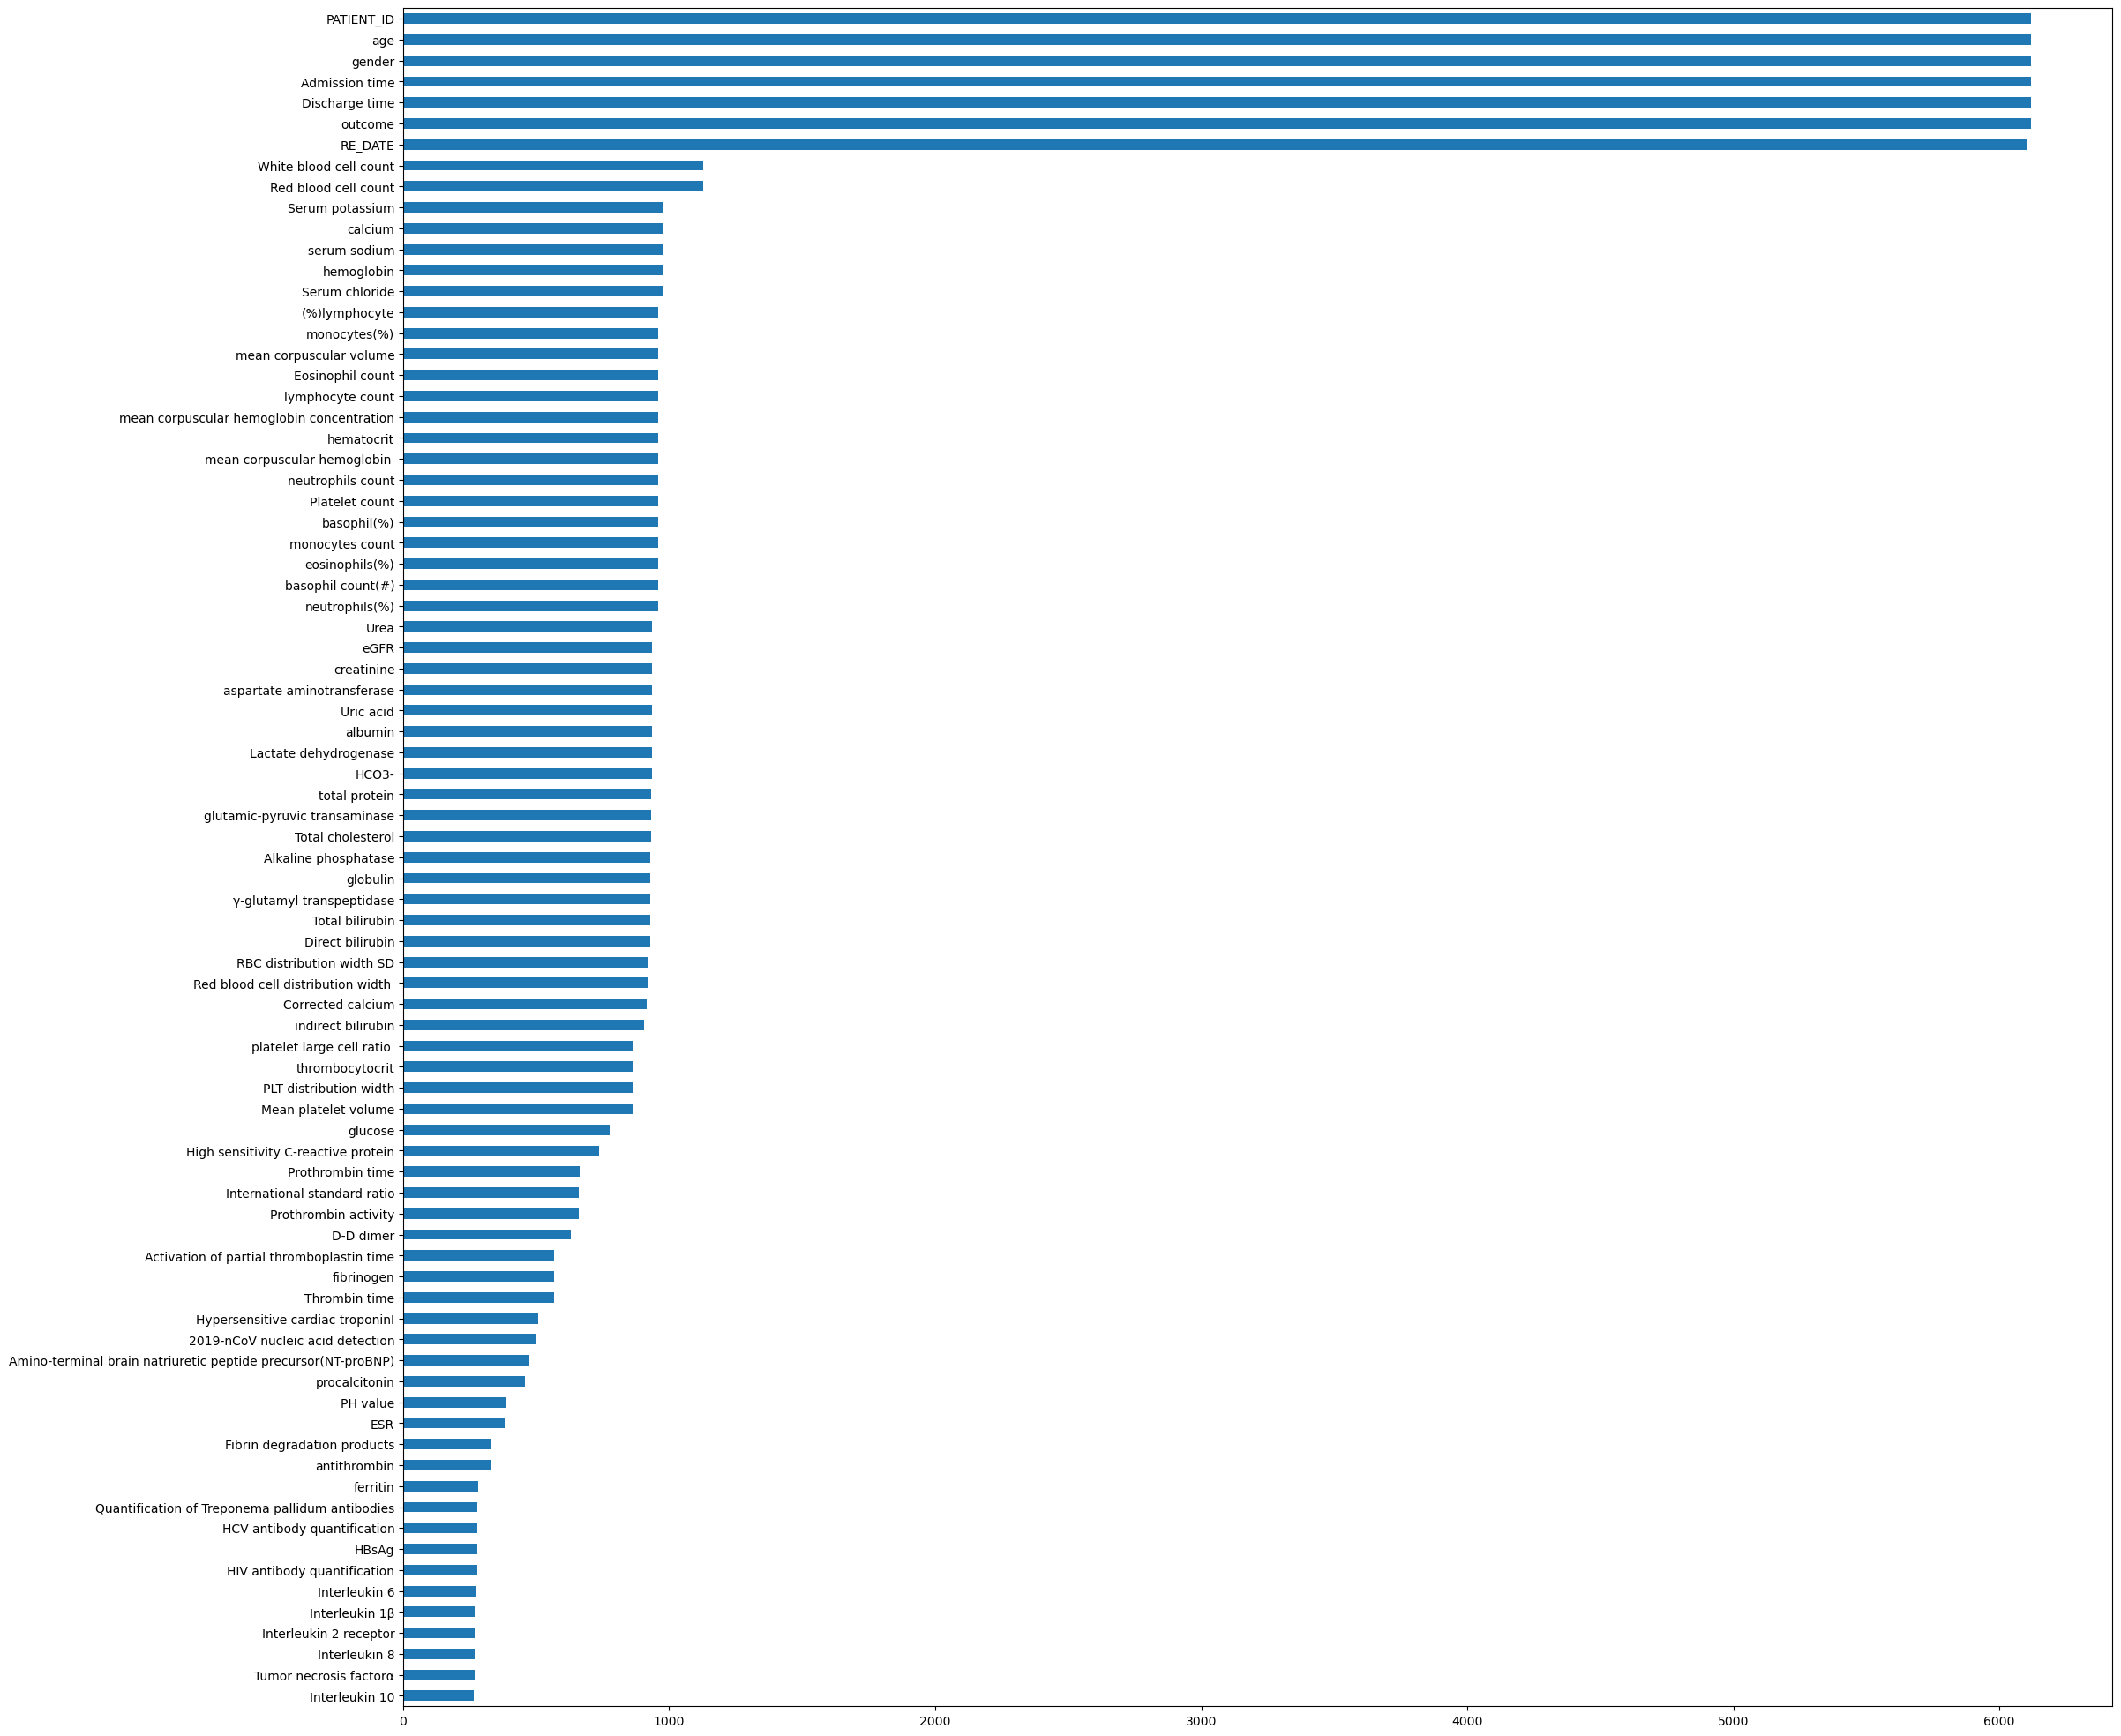

In [7]:
import numpy as np
data3 = data_1.notnull().sum()
data3.sort_values().plot(kind="barh",figsize = (25,25))

## Visualization of Outcome of the data

outcome
0    3215
1    2905
dtype: int64


<AxesSubplot:xlabel='outcome', ylabel='count'>

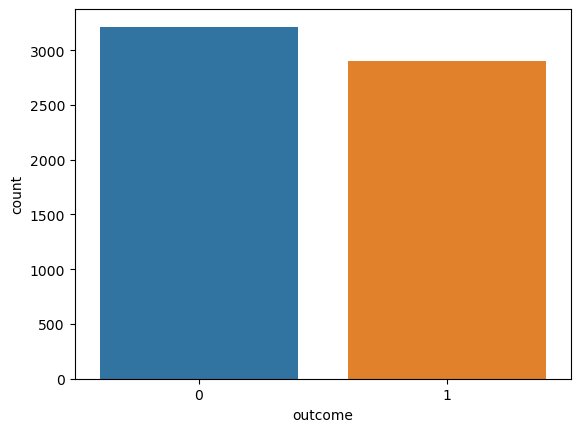

In [8]:
import seaborn as sns
print(data_1.groupby('outcome').size())
sns.countplot(x="outcome", data=data_1)

# Load Test Data

### Creating a new column time_in_hospital

In [9]:
data_1["time_in_hospital"] = (data_1['Discharge time']- data_1['Admission time']).dt.total_seconds()/(86400.0)
data_1["time_in_hospital"]

0       17.602338
1       17.602338
2       17.602338
3       17.602338
4       17.602338
          ...    
6115    10.088160
6116    10.088160
6117    10.088160
6118    10.088160
6119    10.088160
Name: time_in_hospital, Length: 6120, dtype: float64

### Test data

In [10]:
test_data = pd.read_excel("C://Users//bhanu//Documents//summer intern//time_series_test_110_preprocess_en.xlsx")  #test data
test_data['PATIENT_ID'] = [i for i in range(1,len(test_data)+1)]
test_data

PATIENT_ID             RE_DATE  Lactate dehydrogenase  \
0             1 2020-02-10 11:15:00                    NaN   
1             2 2020-02-10 12:07:00                  183.0   
2             3 2020-02-13 09:35:00                    NaN   
3             4 2020-02-13 10:06:00                  194.0   
4             5 2020-02-09 06:56:00                    NaN   
..          ...                 ...                    ...   
752         753 2020-02-05 12:36:00                  562.0   
753         754 2020-02-11 09:40:00                    NaN   
754         755 2020-02-11 10:04:00                  438.0   
755         756 2020-02-17 10:00:00                  430.0   
756         757 2020-02-17 12:05:00                    NaN   

     High sensitivity C-reactive protein  (%)lymphocyte      Admission time  \
0                                    NaN           28.0 2020-02-09 10:47:24   
1                                    5.1            NaN 2020-02-09 10:47:24   
2                                    NaN           28.6 2020-02-09 10:47:24   
3                                    2.7            NaN 2020-02-09 10:47:24   
4                                    NaN           28.3 2020-02-09 03:39:47   
..                                   ...            ...                 ...   
752                                 78.1            NaN 2020-02-05 00:27:57   
753                                  NaN            9.7 2020-02-05 00:27:57   
754                                  NaN            NaN 2020-02-05 00:27:57   
755                                 31.2            NaN 2020-02-05 00:27:57   
756                                  NaN           10.0 2020-02-05 00:27:57   

         Discharge time  outcome  
0   2020-02-21 14:51:12        0  
1   2020-02-21 14:51:12        0  
2   2020-02-21 14:51:12        0  
3   2020-02-21 14:51:12        0  
4   2020-02-21 11:57:40        0  
..                  ...      ...  
752 2020-02-22 14:11:47        0  
753 2020-02-22 14:11:47        0  
754 2020-02-22 14:11:47        0  
755 2020-02-22 14:11:47        0  
756 2020-02-22 14:11:47        0  

[757 rows x 8 columns]

### Sorting the Test Data w.r.t few Attributes 

In [11]:
test_data = test_data.sort_values('RE_DATE')
test_data = test_data.sort_values('PATIENT_ID')
test_data.head()
test_data.shape

(757, 8)

### No. of missing values in each column 

<AxesSubplot:>

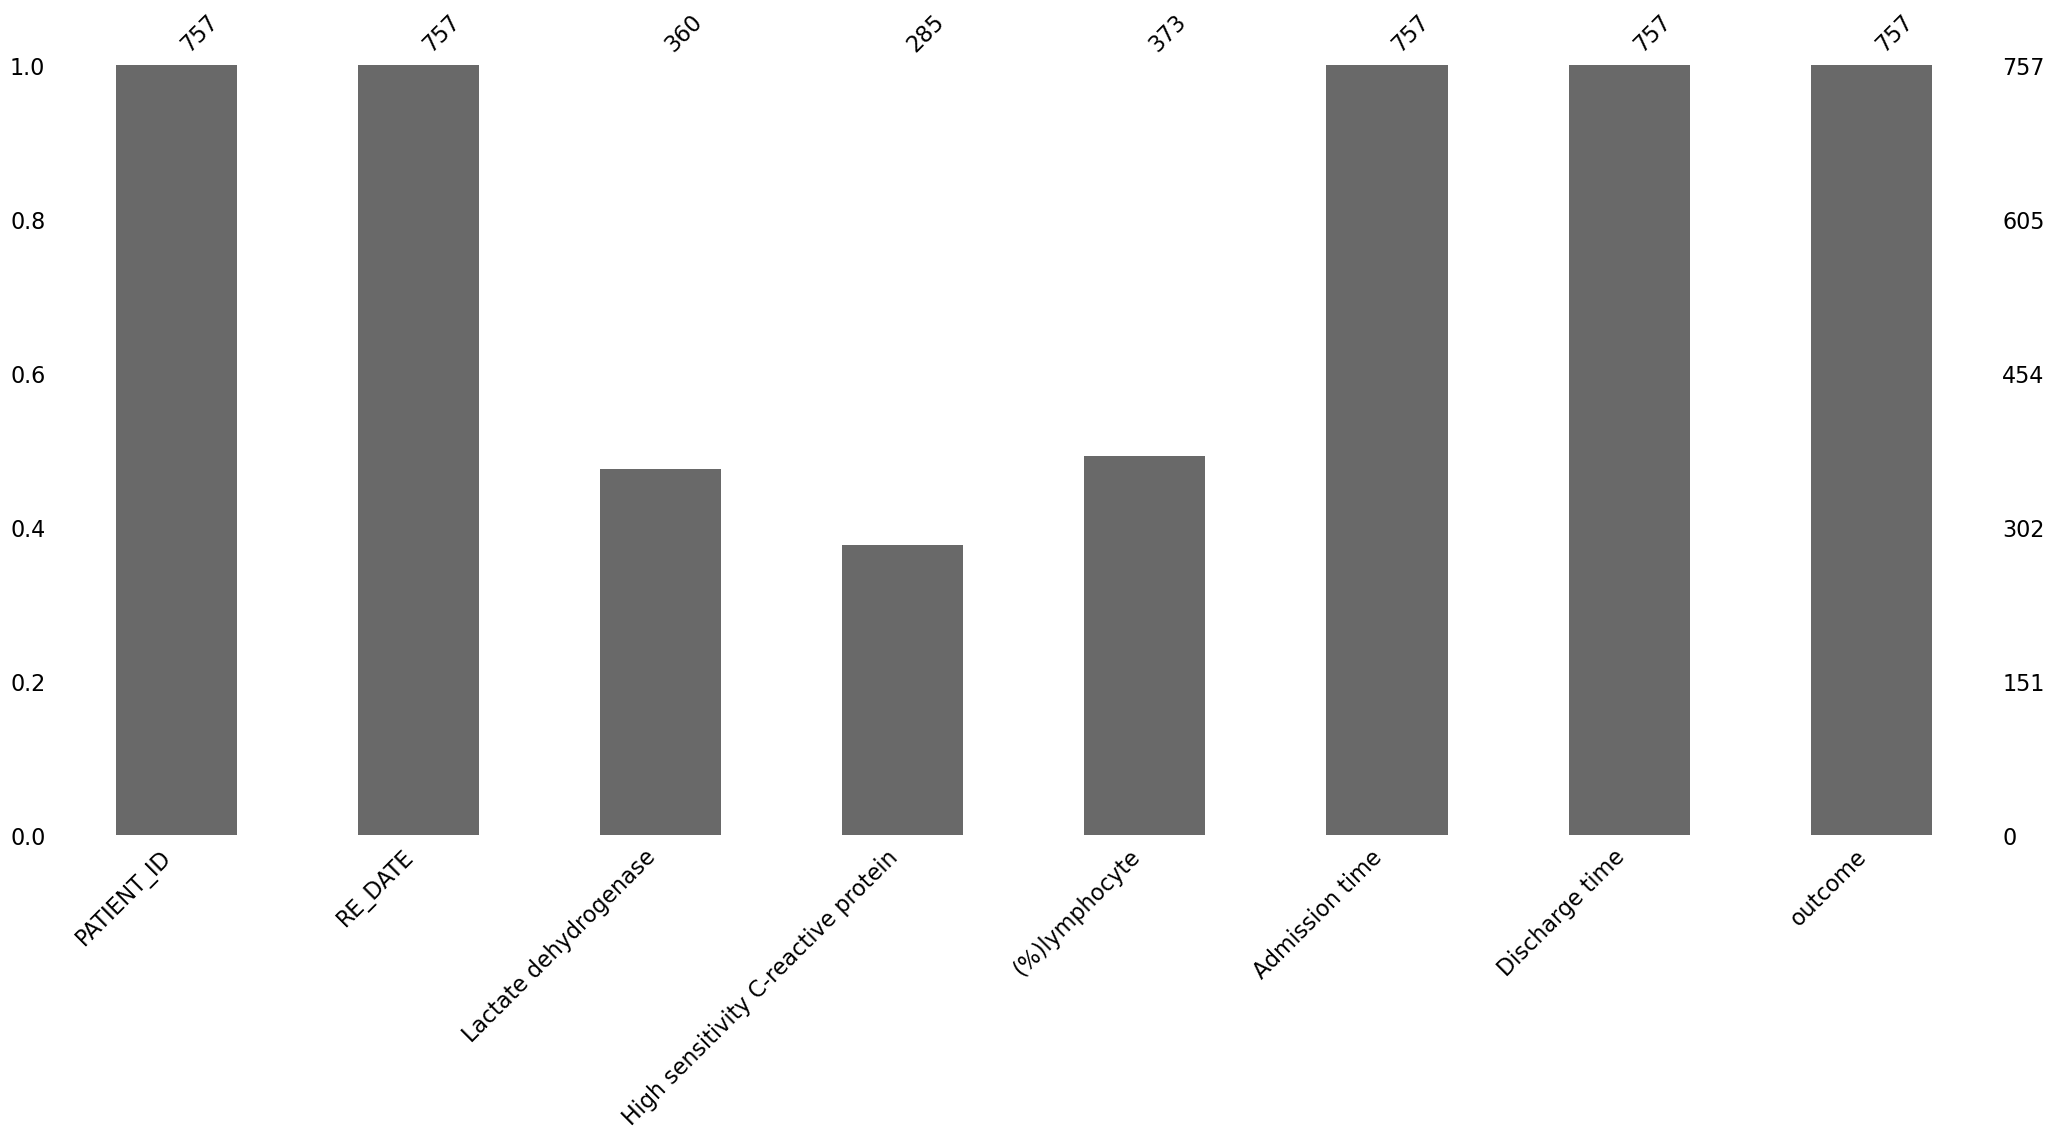

In [12]:
import matplotlib.pyplot as plt
import missingno as msno
msno.bar(test_data)

### Imputing missing values with the median of their resepctive columns

In [13]:
test_data = test_data.fillna(test_data.median())
test_data

C:\Users\bhanu\AppData\Local\Temp\ipykernel_27592\4175621566.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test_data = test_data.fillna(test_data.median())


PATIENT_ID             RE_DATE  Lactate dehydrogenase  \
0             1 2020-02-10 11:15:00                  258.0   
1             2 2020-02-10 12:07:00                  183.0   
2             3 2020-02-13 09:35:00                  258.0   
3             4 2020-02-13 10:06:00                  194.0   
4             5 2020-02-09 06:56:00                  258.0   
..          ...                 ...                    ...   
752         753 2020-02-05 12:36:00                  562.0   
753         754 2020-02-11 09:40:00                  258.0   
754         755 2020-02-11 10:04:00                  438.0   
755         756 2020-02-17 10:00:00                  430.0   
756         757 2020-02-17 12:05:00                  258.0   

     High sensitivity C-reactive protein  (%)lymphocyte      Admission time  \
0                                    9.1           28.0 2020-02-09 10:47:24   
1                                    5.1           17.8 2020-02-09 10:47:24   
2                                    9.1           28.6 2020-02-09 10:47:24   
3                                    2.7           17.8 2020-02-09 10:47:24   
4                                    9.1           28.3 2020-02-09 03:39:47   
..                                   ...            ...                 ...   
752                                 78.1           17.8 2020-02-05 00:27:57   
753                                  9.1            9.7 2020-02-05 00:27:57   
754                                  9.1           17.8 2020-02-05 00:27:57   
755                                 31.2           17.8 2020-02-05 00:27:57   
756                                  9.1           10.0 2020-02-05 00:27:57   

         Discharge time  outcome  
0   2020-02-21 14:51:12        0  
1   2020-02-21 14:51:12        0  
2   2020-02-21 14:51:12        0  
3   2020-02-21 14:51:12        0  
4   2020-02-21 11:57:40        0  
..                  ...      ...  
752 2020-02-22 14:11:47        0  
753 2020-02-22 14:11:47        0  
754 2020-02-22 14:11:47        0  
755 2020-02-22 14:11:47        0  
756 2020-02-22 14:11:47        0  

[757 rows x 8 columns]

### Data types of columns 

In [14]:
test_data["time_in_hospital"] = (test_data['Discharge time']- test_data['Admission time']).dt.total_seconds()/(86400.0)
test_data.dtypes


PATIENT_ID                                      int64
RE_DATE                                datetime64[ns]
Lactate dehydrogenase                         float64
High sensitivity C-reactive protein           float64
(%)lymphocyte                                 float64
Admission time                         datetime64[ns]
Discharge time                         datetime64[ns]
outcome                                         int64
time_in_hospital                              float64
dtype: object

##  TEST 1: Prediction using the same Features as Test Data 

In [15]:
#taking the same data features as of test dataset
train_data = data_1[['Admission time','Discharge time','outcome','High sensitivity C-reactive protein','(%)lymphocyte','Lactate dehydrogenase',"time_in_hospital"]]
train_data = train_data.fillna(train_data.median())
train_data.shape
test_data = test_data[['Admission time','Discharge time','outcome','High sensitivity C-reactive protein','(%)lymphocyte','Lactate dehydrogenase',"time_in_hospital"]]

C:\Users\bhanu\AppData\Local\Temp\ipykernel_27592\2618773809.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  train_data = train_data.fillna(train_data.median())


## Visualization of Training Data

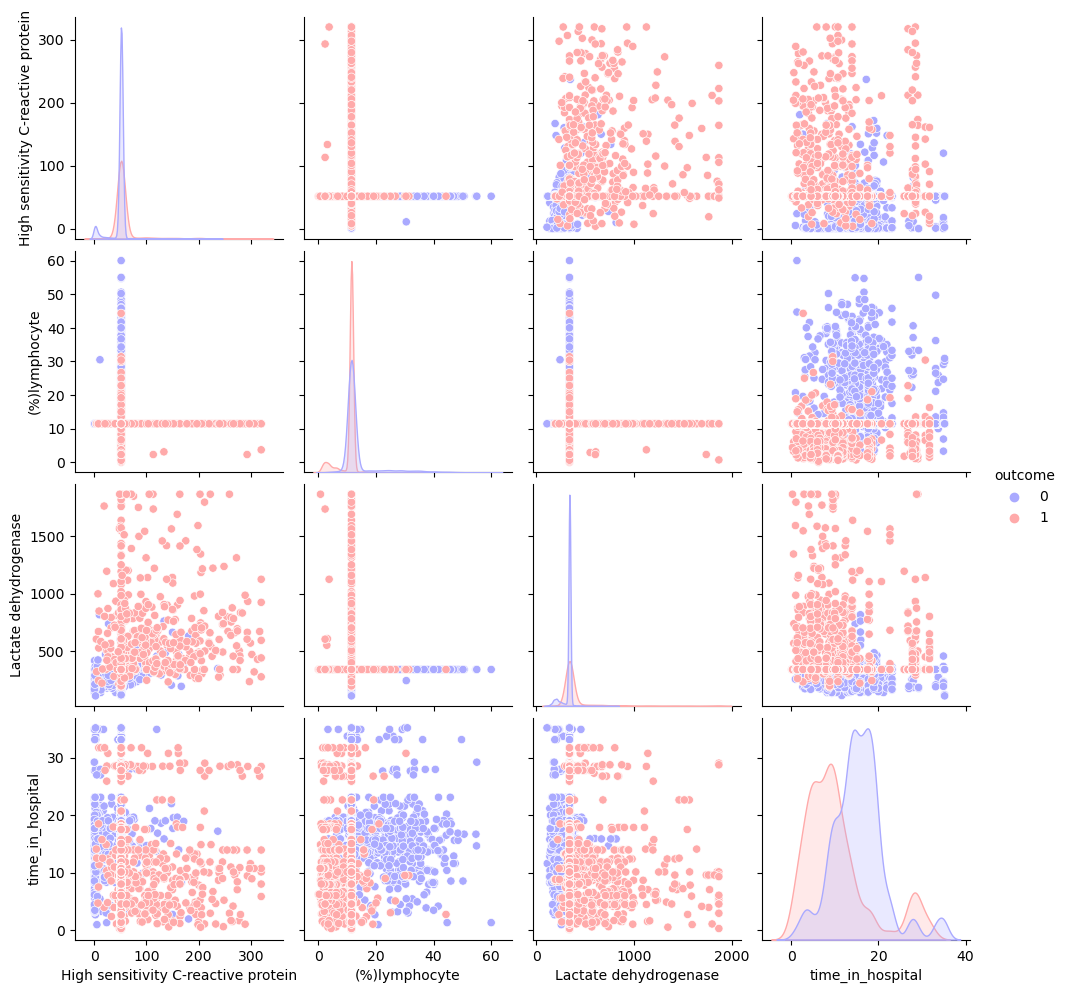

In [16]:
import seaborn as sns
sns.pairplot(train_data,hue='outcome',palette='bwr')

## Decision Tree

In [17]:
features_column =  ['Lactate dehydrogenase', '(%)lymphocyte','High sensitivity C-reactive protein',"time_in_hospital"]
target_column = ['outcome']
acc_results= []
Xtrain_data = train_data[features_column]
Ytrain_data = train_data[target_column].values.ravel()
Xtest_data = test_data[features_column]
Ytest_data = test_data[target_column].values.ravel()
model_DT = DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=0)
model_DT= model_DT.fit(Xtrain_data,Ytrain_data)
target_pred = model_DT.predict(Xtest_data)

#print(target_pred)
print("accuracy of Decision Tree",metrics.accuracy_score(Ytest_data, target_pred))
acc_results.append(metrics.accuracy_score(Ytest_data, target_pred))

accuracy of Decision Tree 0.7807133421400264


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)
model_RF = model_RF.fit(Xtrain_data,Ytrain_data)
target_pred_RF = model_RF.predict(Xtest_data)
print("accuracy of Random Forest",metrics.accuracy_score(Ytest_data, target_pred_RF))
acc_results.append(metrics.accuracy_score(Ytest_data, target_pred_RF))

accuracy of Random Forest 0.8441215323645971


## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
model_GB = GaussianNB()
model_GB = model_GB.fit(Xtrain_data,Ytrain_data)
target_pred_GB = model_GB.predict(Xtest_data)
print("accuracy of Gaussian Naive Bayes",metrics.accuracy_score(Ytest_data, target_pred_GB))
acc_results.append(metrics.accuracy_score(Ytest_data, target_pred_GB))

accuracy of Gaussian Naive Bayes 0.6142668428005285


## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model_LR = LogisticRegression(solver='liblinear', random_state=0)
model_LR = model_LR.fit(Xtrain_data,Ytrain_data)
target_pred_LR = model_LR.predict(Xtest_data)
print("accuracy of Logistic Regression: ",metrics.accuracy_score(Ytest_data, target_pred_LR))
acc_results.append(metrics.accuracy_score(Ytest_data, target_pred_LR))

accuracy of Logistic Regression:  0.8124174372523117


### Confusion Matrix

In [21]:
print("The confusion matrix is ",*confusion_matrix(Ytest_data,target_pred_LR))

The confusion matrix is  [482   3] [139 133]


## Support Vector Machines

In [22]:
from sklearn.svm import SVC

model_SVM = SVC()
model_SVM  = model_SVM.fit(Xtrain_data,Ytrain_data)
target_pred_SVM = model_SVM.predict(Xtest_data)
print("The accuracy of Support Vector Machines is : ",metrics.accuracy_score(Ytest_data, target_pred_SVM))
acc_results.append(metrics.accuracy_score(Ytest_data, target_pred_SVM))

The accuracy of Support Vector Machines is :  0.774108322324967


## Artificial Neural Networks

In [23]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(64, activation='tanh', input_dim=4))
model.add(Dense(16, activation='tanh', input_dim=4))
model.add(Dense(8, activation='tanh', input_dim=4))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


### Fitting the data to Neural Network 

In [24]:
hist = model.fit(Xtrain_data, Ytrain_data, validation_data=(Xtest_data, Ytest_data), epochs=100, batch_size=100)

Epoch 1/100
62/62 [==============================] - 1s 4ms/step - loss: 0.6100 - accuracy: 0.7078 - val_loss: 0.5734 - val_accuracy: 0.6671
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.7574 - val_loss: 0.4289 - val_accuracy: 0.7820
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7708 - val_loss: 0.5041 - val_accuracy: 0.7332
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.7856 - val_loss: 0.3976 - val_accuracy: 0.8230
Epoch 5/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.7899 - val_loss: 0.2851 - val_accuracy: 0.8917
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.8013 - val_loss: 0.3146 - val_accuracy: 0.8851
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.7966 - val_loss: 0.2724 - val_accuracy: 0.8983
Epoch 8/100
6

Epoch 59/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8137 - val_loss: 0.3535 - val_accuracy: 0.8692
Epoch 60/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.8141 - val_loss: 0.3273 - val_accuracy: 0.8758
Epoch 61/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8106 - val_loss: 0.4096 - val_accuracy: 0.8600
Epoch 62/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8142 - val_loss: 0.4212 - val_accuracy: 0.8666
Epoch 63/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8113 - val_loss: 0.4972 - val_accuracy: 0.8230
Epoch 64/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.8163 - val_loss: 0.4120 - val_accuracy: 0.8639
Epoch 65/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8126 - val_loss: 0.4394 - val_accuracy: 0.8402
Epoch 

### Visualizing the accuracy calculated from Neural Network

The accuracy is :  0.8125817179679871


[]

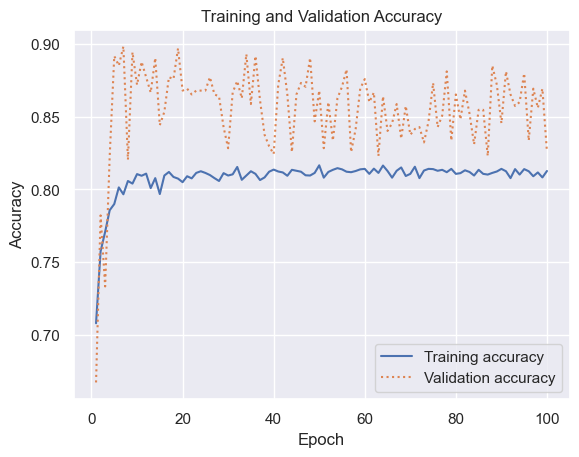

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
print("The accuracy is : ",acc[-1])
acc_results.append(acc[-1])
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

#### The  graph below shows the Accuracy using different Classification Algorithms

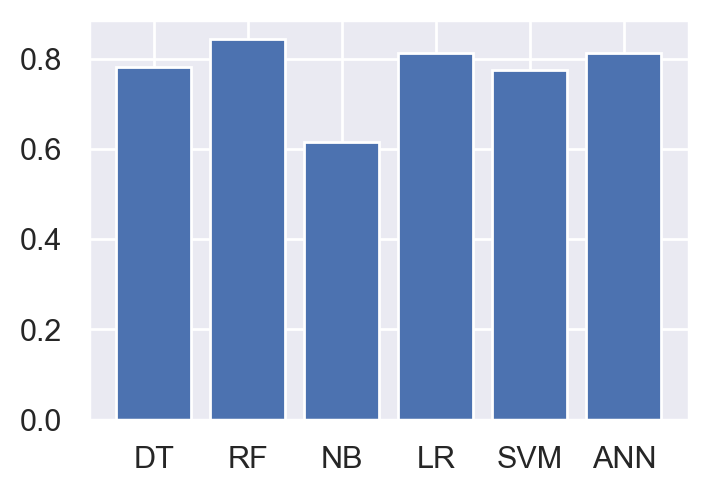

[0.7807133421400264, 0.8441215323645971, 0.6142668428005285, 0.8124174372523117, 0.774108322324967, 0.8125817179679871]


In [50]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(3, 2), dpi=200)
ax = fig.add_axes([0,0,1,1])
langs = ['DT', 'RF','NB','LR','SVM','ANN']

ax.bar(langs,acc_results)
plt.show()
print(acc_results)

# Test 2: Models for train test split data - 
## Biomarkers selected which truly determine the mortality

In [27]:
# training data for 7 selected biomarkers
train_data_new = data_1[['PATIENT_ID','RE_DATE','Admission time','Discharge time','outcome','2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','time_in_hospital']]

### Imputing the missing values

In [28]:
train_data_new.index = np.arange(1, len(train_data_new)+1)
train_data_new['PATIENT_ID']=train_data_new.index

train_data_new = train_data_new.fillna(train_data_new.median())
train_data_new.head()

C:\Users\bhanu\AppData\Local\Temp\ipykernel_27592\3826328354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_new['PATIENT_ID']=train_data_new.index
C:\Users\bhanu\AppData\Local\Temp\ipykernel_27592\3826328354.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  train_data_new = train_data_new.fillna(train_data_new.median())


PATIENT_ID             RE_DATE      Admission time      Discharge time  \
1           1 2020-01-31 01:09:00 2020-01-30 22:12:47 2020-02-17 12:40:09   
2           2 2020-01-31 01:25:00 2020-01-30 22:12:47 2020-02-17 12:40:09   
3           3 2020-01-31 01:44:00 2020-01-30 22:12:47 2020-02-17 12:40:09   
4           4 2020-01-31 01:45:00 2020-01-30 22:12:47 2020-02-17 12:40:09   
5           5 2020-01-31 01:56:00 2020-01-30 22:12:47 2020-02-17 12:40:09   

   outcome  2019-nCoV nucleic acid detection  Platelet count  D-D dimer  \
1        0                              -1.0           178.0      2.155   
2        0                              -1.0           105.0      2.155   
3        0                              -1.0           178.0      2.155   
4        0                              -1.0           178.0      2.200   
5        0                              -1.0           178.0      2.155   

   Hypersensitive cardiac troponinI  lymphocyte count  creatinine  \
1                              20.6               0.8        76.0   
2                              20.6               0.8        76.0   
3                              20.6               0.8       130.0   
4                              20.6               0.8        76.0   
5                              19.9               0.8        76.0   

   White blood cell count  neutrophils count   Urea  time_in_hospital  
1                    7.72               5.85  5.985         17.602338  
2                    3.54               2.33  5.985         17.602338  
3                    7.72               5.85  8.500         17.602338  
4                    7.72               5.85  5.985         17.602338  
5                    7.72               5.85  5.985         17.602338

## Visualization of Training Data

In [29]:
features = ['2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','time_in_hospital']
target = ['outcome']
X = train_data_new[features]
y = train_data_new[target]

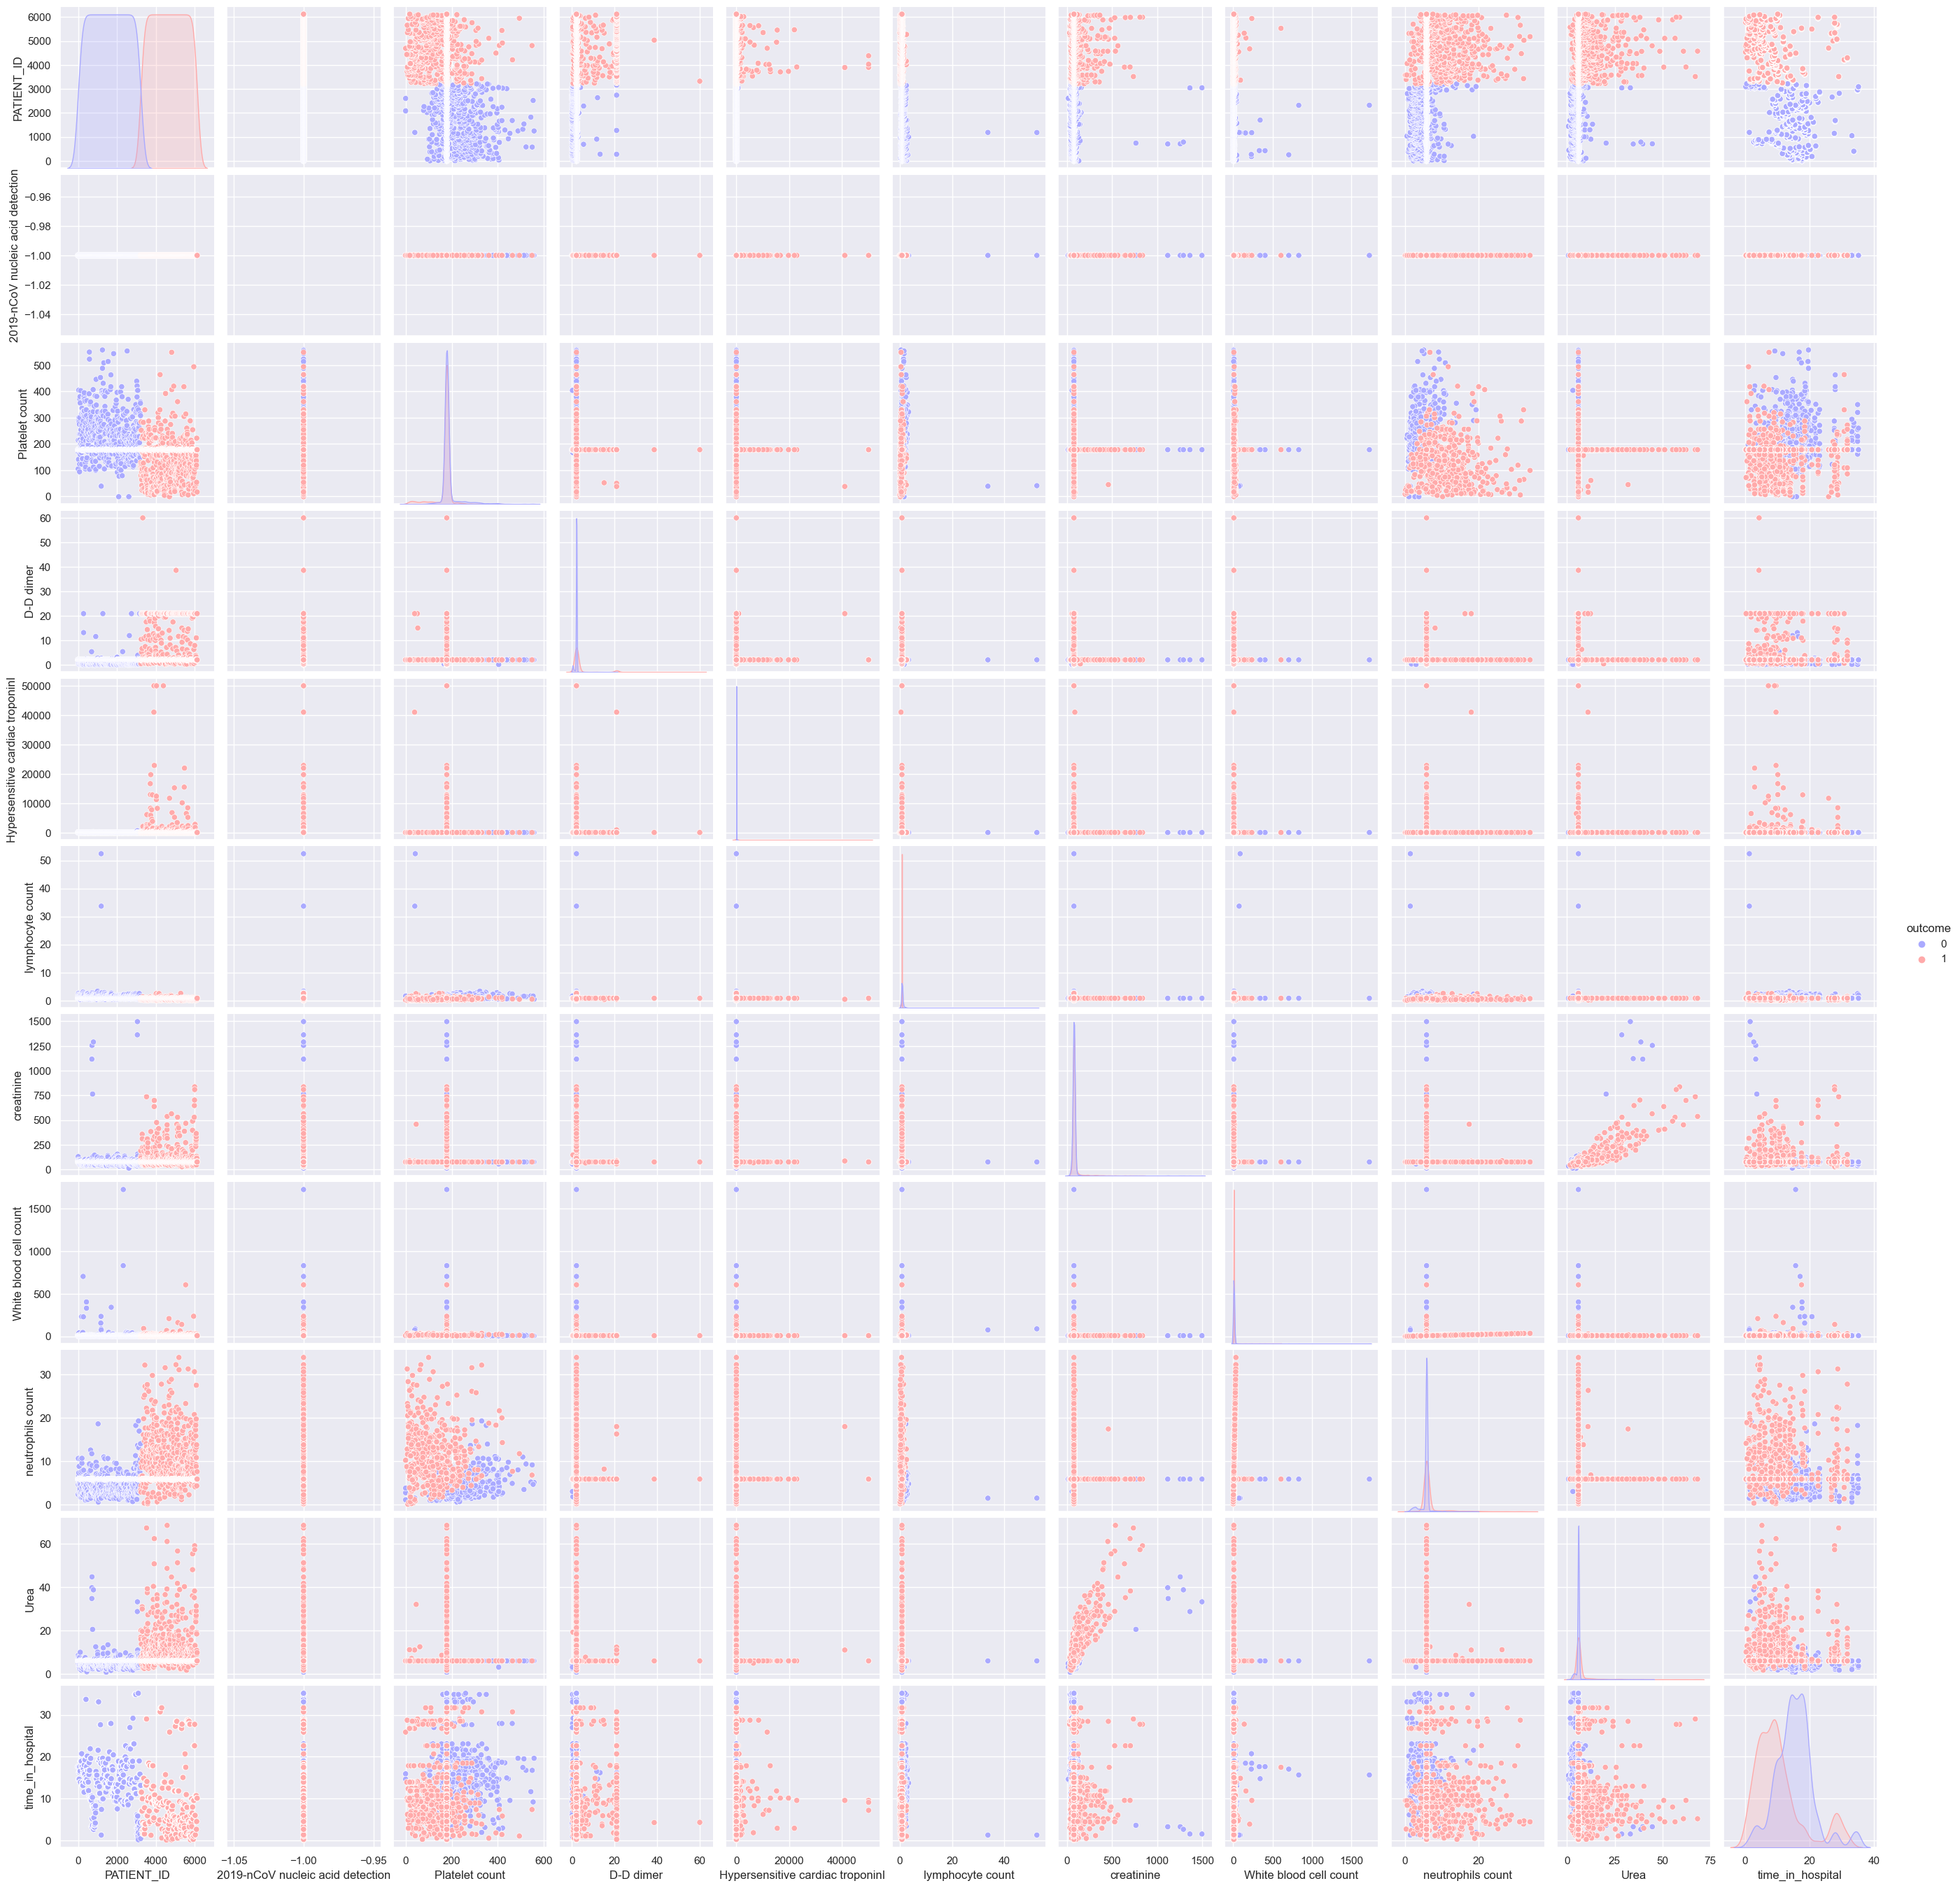

In [30]:
import seaborn as sns
sns.pairplot(train_data_new,hue='outcome',palette='bwr')

## Training using DT, RF and SVM

Decision Tree : 0.976961 (0.005821)
Support Vector Machines: 0.594608 (0.022505)
Random Forest : 0.966176 (0.008523)


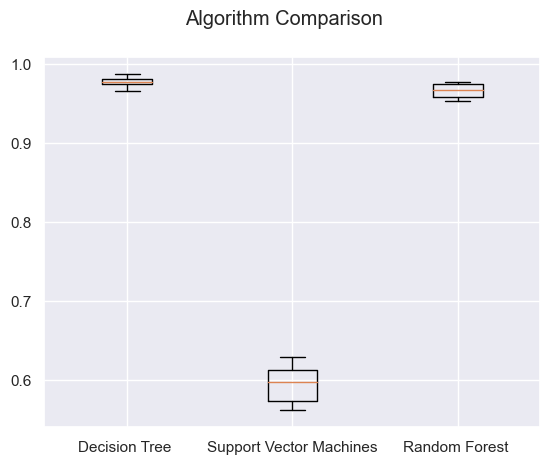

In [31]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X = train_data_new[features]
Y = train_data_new[target].values.ravel()
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('Decision Tree ', DecisionTreeClassifier()))
models.append(('Support Vector Machines', SVC()))
models.append(('Random Forest ', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)))
# models.append(('LR',LogisticRegression()))
# evaluate each model in turn
results = []
names = []

scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.bar(results,height=100)
plt.subplot()
ax.set_xticklabels(names)
plt.show()

## Using Neural Networks considering only Selected biomarkers

In [32]:
from sklearn.model_selection import train_test_split
X = train_data_new[features]
Y = train_data_new[target].values.ravel()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=0)

from keras.models import Sequential
from keras.layers import Dense
model = Sequential() 
model.add(Dense(128, activation='tanh', input_dim=10))
model.add(Dense(32, activation='tanh', input_dim=10))
# model.add(Dense(32, activation='tanh', input_dim=10))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1408      
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


## Fitting the Data into Neural Network

In [33]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=100)

Epoch 1/40
43/43 [==============================] - 1s 8ms/step - loss: 0.6213 - accuracy: 0.6501 - val_loss: 0.5578 - val_accuracy: 0.7500
Epoch 2/40
43/43 [==============================] - 0s 4ms/step - loss: 0.5205 - accuracy: 0.7570 - val_loss: 0.5128 - val_accuracy: 0.7549
Epoch 3/40
43/43 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.7666 - val_loss: 0.5007 - val_accuracy: 0.7511
Epoch 4/40
43/43 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.7782 - val_loss: 0.4770 - val_accuracy: 0.7745
Epoch 5/40
43/43 [==============================] - 0s 4ms/step - loss: 0.4494 - accuracy: 0.7838 - val_loss: 0.4804 - val_accuracy: 0.7778
Epoch 6/40
43/43 [==============================] - 0s 4ms/step - loss: 0.4483 - accuracy: 0.7927 - val_loss: 0.4604 - val_accuracy: 0.7734
Epoch 7/40
43/43 [==============================] - 0s 4ms/step - loss: 0.4322 - accuracy: 0.7969 - val_loss: 0.4646 - val_accuracy: 0.7794
Epoch 8/40
43/43 [==

## Visualizing the accuracy calculated from Neural Network

The accuracy is:  0.8326330780982971


[]

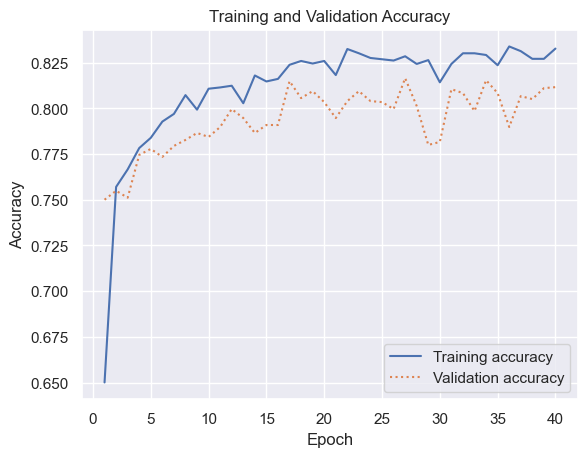

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
print("The accuracy is: ",acc[-1])

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# Test 3: Combined Set 
# (by using all the Attributes present in the Dataset)

In [35]:

train_data_combined = data_1.drop(['PATIENT_ID','Admission time','Discharge time','RE_DATE'],axis=1)
train_data_combined

age  gender  outcome  Hypersensitive cardiac troponinI  hemoglobin  \
0      73       1        0                               NaN         NaN   
1      73       1        0                               NaN       136.0   
2      73       1        0                               NaN         NaN   
3      73       1        0                               NaN         NaN   
4      73       1        0                              19.9         NaN   
...   ...     ...      ...                               ...         ...   
6115   68       1        1                              84.9         NaN   
6116   68       1        1                               NaN         NaN   
6117   68       1        1                               NaN         NaN   
6118   68       1        1                               NaN       155.0   
6119   68       1        1                               NaN         NaN   

      Serum chloride  Prothrombin time  procalcitonin  eosinophils(%)  \
0                NaN               NaN            NaN             NaN   
1                NaN               NaN            NaN             0.6   
2              103.1               NaN            NaN             NaN   
3                NaN              13.9            NaN             NaN   
4                NaN               NaN           0.09             NaN   
...              ...               ...            ...             ...   
6115             NaN               NaN            NaN             NaN   
6116             NaN               NaN            NaN             NaN   
6117           105.2               NaN            NaN             NaN   
6118             NaN               NaN            NaN             0.0   
6119             NaN              17.9            NaN             NaN   

      Interleukin 2 receptor  ...  Activation of partial thromboplastin time  \
0                        NaN  ...                                        NaN   
1                        NaN  ...                                        NaN   
2                        NaN  ...                                        NaN   
3                        NaN  ...                                        NaN   
4                        NaN  ...                                        NaN   
...                      ...  ...                                        ...   
6115                     NaN  ...                                        NaN   
6116                     NaN  ...                                        NaN   
6117                     NaN  ...                                        NaN   
6118                     NaN  ...                                        NaN   
6119                     NaN  ...                                       35.8   

      High sensitivity C-reactive protein  HIV antibody quantification  \
0                                     NaN                          NaN   
1                                     NaN                          NaN   
2                                    43.1                          NaN   
3                                     NaN                          NaN   
4                                     NaN                          NaN   
...                                   ...                          ...   
6115                                  NaN                          NaN   
6116                                  NaN                          NaN   
6117                                267.0                          NaN   
6118                                  NaN                          NaN   
6119                                  NaN                          NaN   

      serum sodium  thrombocytocrit  ESR  glutamic-pyruvic transaminase  eGFR  \
0              NaN              NaN  NaN                            NaN   NaN   
1              NaN             0.12  NaN                            NaN   NaN   
2            137.7              NaN  NaN                           16.0  46.6   
3              NaN              NaN  NaN  

## Imputing the missing values

In [36]:
train_data_combined = train_data_combined.fillna(train_data_combined.median())
train_data_combined

age  gender  outcome  Hypersensitive cardiac troponinI  hemoglobin  \
0      73       1        0                              20.6       125.0   
1      73       1        0                              20.6       136.0   
2      73       1        0                              20.6       125.0   
3      73       1        0                              20.6       125.0   
4      73       1        0                              19.9       125.0   
...   ...     ...      ...                               ...         ...   
6115   68       1        1                              84.9       125.0   
6116   68       1        1                              20.6       125.0   
6117   68       1        1                              20.6       125.0   
6118   68       1        1                              20.6       155.0   
6119   68       1        1                              20.6       125.0   

      Serum chloride  Prothrombin time  procalcitonin  eosinophils(%)  \
0              102.1              14.8           0.10             0.1   
1              102.1              14.8           0.10             0.6   
2              103.1              14.8           0.10             0.1   
3              102.1              13.9           0.10             0.1   
4              102.1              14.8           0.09             0.1   
...              ...               ...            ...             ...   
6115           102.1              14.8           0.10             0.1   
6116           102.1              14.8           0.10             0.1   
6117           105.2              14.8           0.10             0.1   
6118           102.1              14.8           0.10             0.0   
6119           102.1              17.9           0.10             0.1   

      Interleukin 2 receptor  ...  Activation of partial thromboplastin time  \
0                      676.5  ...                                       39.2   
1                      676.5  ...                                       39.2   
2                      676.5  ...                                       39.2   
3                      676.5  ...                                       39.2   
4                      676.5  ...                                       39.2   
...                      ...  ...                                        ...   
6115                   676.5  ...                                       39.2   
6116                   676.5  ...                                       39.2   
6117                   676.5  ...                                       39.2   
6118                   676.5  ...                                       39.2   
6119                   676.5  ...                                       35.8   

      High sensitivity C-reactive protein  HIV antibody quantification  \
0                                    51.5                         0.09   
1                                    51.5                         0.09   
2                                    43.1                         0.09   
3                                    51.5                         0.09   
4                                    51.5                         0.09   
...                                   ...                          ...   
6115                                 51.5                         0.09   
6116                                 51.5                         0.09   
6117                                267.0                         0.09   
6118                                 51.5                         0.09   
6119                                 51.5                         0.09   

      serum sodium  thrombocytocrit   ESR  glutamic-pyruvic transaminase  \
0            140.4             0.21  28.0                           24.0   
1            140.4             0.12  28.0                           24.0   
2            137.7             0.21  28.0                           16.0   
3            140.4             0.21  28.0                     

### plotting a scatter plot w.r.t all attributes(blue - '1' and red - '0') 

In [37]:
features2 = ['2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','time_in_hospital','Lactate dehydrogenase', '(%)lymphocyte','High sensitivity C-reactive protein']
target2 = ['outcome']

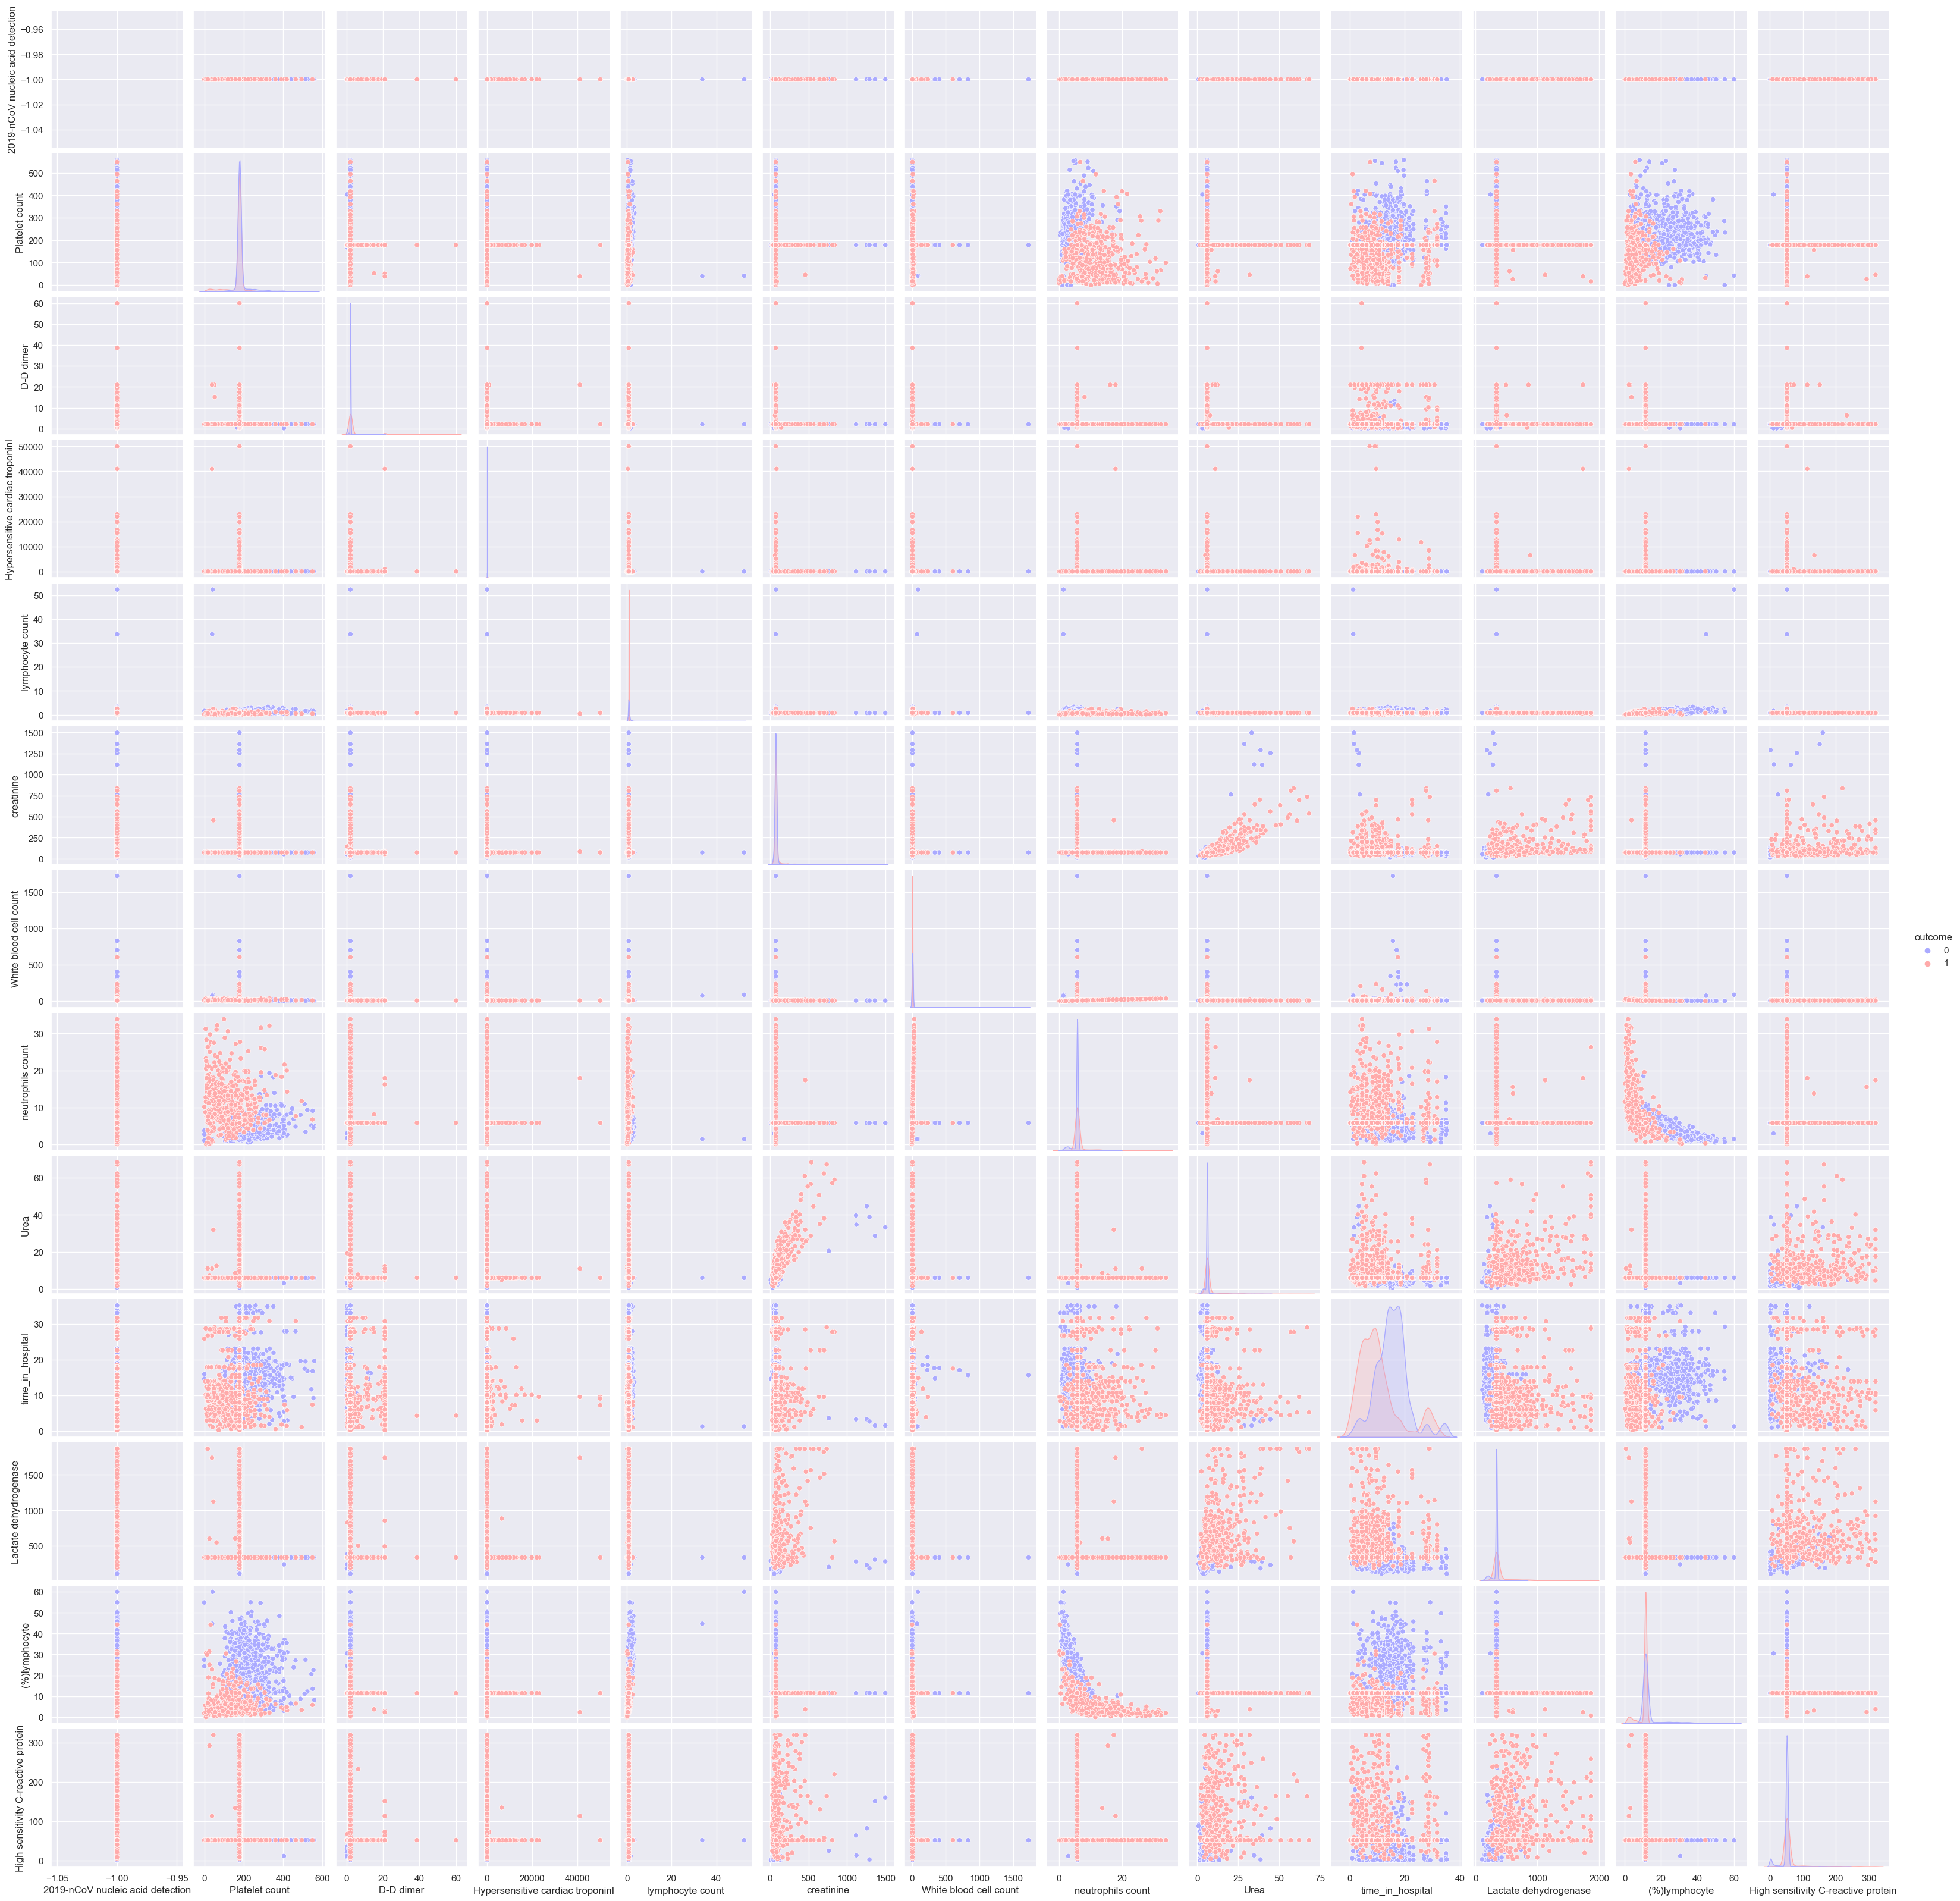

In [38]:
import seaborn as sns
sns.pairplot(train_data_combined[features2+target2],hue='outcome',palette='bwr')
# g = sns.PairGrid(train_data_combined, hue = 'outcome')
# g = g.map(sns.scatterplot)

### The accuracy we get by implementing all the classification algortithms by using all the attributes present in the dataset

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)

Decision Tree: 0.980392 (0.006114)
Support Vector Machines: 0.639706 (0.022809)
Random Forest : 0.967647 (0.007587)


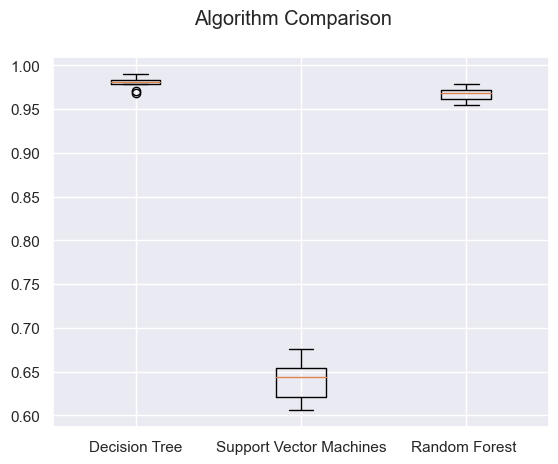

In [40]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
X = train_data_combined[features2]
Y = train_data_combined[target2].values.ravel()
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Support Vector Machines', SVC()))
models.append(('Random Forest ', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)
))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.bar(results,height=100)
plt.subplot()
ax.set_xticklabels(names)
plt.show()

### Artificial Neural Networks by using all the columns in combined set

### Splitting data into Training Set and Testing Set

In [41]:
from sklearn.model_selection import train_test_split
Xs = train_data_combined
Ys = train_data_new[target].values.ravel()
x_train, x_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.3, stratify=Ys, random_state=0)

## Creating a Neural Network Model

In [42]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='tanh', input_dim=78))
model.add(Dense(32, activation='tanh', input_dim=78))
# model.add(Dense(32, activation='tanh', input_dim=10))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               10112     
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,273
Trainable params: 14,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
43/43 [==============================] - 1s 4ms/step - loss: 0.5939 - accuracy: 0.7045 - val_loss: 0.4956 - val_accuracy: 0.7881
Epoch 2/40
43/43 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7941 - val_loss: 0.4435 - val_accuracy: 0.7947
Epoch 3/40
43/43 [================

## Visualizing the accuracy calculated from Neural Network

The accuracy is:  0.9052287340164185


[]

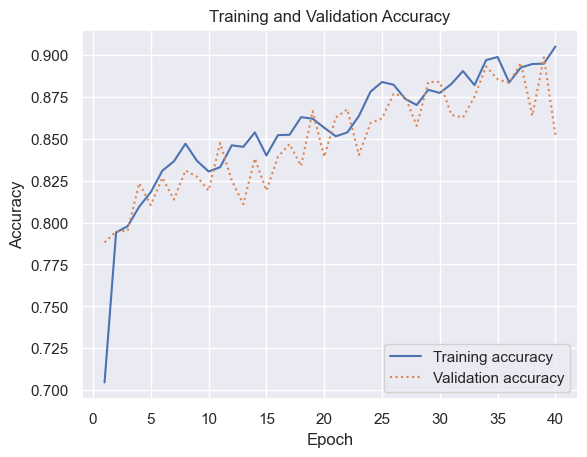

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
print("The accuracy is: ",acc[-1])
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# Test 4 : Feature Selection using XGBoost

In [44]:
# feature selection from all the biomarkers
feature = ['Hypersensitive cardiac troponinI',
       'hemoglobin', 'Serum chloride', 'Prothrombin time', 'procalcitonin',
       'eosinophils(%)', 'Interleukin 2 receptor', 'Alkaline phosphatase',
       'albumin', 'basophil(%)', 'Interleukin 10', 'Total bilirubin',
       'Platelet count', 'monocytes(%)', 'antithrombin', 'Interleukin 8',
       'indirect bilirubin', 'Red blood cell distribution width ',
       'neutrophils(%)', 'total protein',
       'Quantification of Treponema pallidum antibodies',
       'Prothrombin activity', 'HBsAg', 'mean corpuscular volume',
       'hematocrit', 'White blood cell count', 'Tumor necrosis factorα',
       'mean corpuscular hemoglobin concentration', 'fibrinogen',
       'Interleukin 1β', 'Urea', 'lymphocyte count', 'PH value',
       'Red blood cell count', 'Eosinophil count', 'Corrected calcium',
       'Serum potassium', 'glucose', 'neutrophils count', 'Direct bilirubin',
       'Mean platelet volume', 'ferritin', 'RBC distribution width SD',
       'Thrombin time', '(%)lymphocyte', 'HCV antibody quantification',
       'D-D dimer', 'Total cholesterol', 'aspartate aminotransferase',
       'Uric acid', 'HCO3-', 'calcium',
       'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)',
       'Lactate dehydrogenase', 'platelet large cell ratio ', 'Interleukin 6',
       'Fibrin degradation products', 'monocytes count',
       'PLT distribution width', 'globulin', 'γ-glutamyl transpeptidase',
       'International standard ratio', 'basophil count(#)',
       '2019-nCoV nucleic acid detection', 'mean corpuscular hemoglobin ',
       'Activation of partial thromboplastin time',
       'High sensitivity C-reactive protein', 'HIV antibody quantification',
       'serum sodium', 'thrombocytocrit', 'ESR',
       'glutamic-pyruvic transaminase', 'eGFR', 'creatinine']
outcome = ['outcome']
Xdata = data_1[feature]
Ydata = data_1[outcome]
Xdata = Xdata.fillna(Xdata.median())
Xdata.head()

Hypersensitive cardiac troponinI  hemoglobin  Serum chloride  \
0                              20.6       125.0           102.1   
1                              20.6       136.0           102.1   
2                              20.6       125.0           103.1   
3                              20.6       125.0           102.1   
4                              19.9       125.0           102.1   

   Prothrombin time  procalcitonin  eosinophils(%)  Interleukin 2 receptor  \
0              14.8           0.10             0.1                   676.5   
1              14.8           0.10             0.6                   676.5   
2              14.8           0.10             0.1                   676.5   
3              13.9           0.10             0.1                   676.5   
4              14.8           0.09             0.1                   676.5   

   Alkaline phosphatase  albumin  basophil(%)  ...  \
0                  69.5     32.2          0.2  ...   
1                  69.5     32.2          0.3  ...   
2                  46.0     33.3          0.2  ...   
3                  69.5     32.2          0.2  ...   
4                  69.5     32.2          0.2  ...   

   mean corpuscular hemoglobin   Activation of partial thromboplastin time  \
0                          30.9                                       39.2   
1                          31.9                                       39.2   
2                          30.9                                       39.2   
3                          30.9                                       39.2   
4                          30.9                                       39.2   

   High sensitivity C-reactive protein  HIV antibody quantification  \
0                                 51.5                         0.09   
1                                 51.5                         0.09   
2                                 43.1                         0.09   
3                                 51.5                         0.09   
4                                 51.5                         0.09   

   serum sodium  thrombocytocrit   ESR  glutamic-pyruvic transaminase  eGFR  \
0         140.4             0.21  28.0                           24.0  87.9   
1         140.4             0.12  28.0                           24.0  87.9   
2         137.7             0.21  28.0                           16.0  46.6   
3         140.4             0.21  28.0                           24.0  87.9   
4         140.4             0.21  28.0                           24.0  87.9   

   creatinine  
0        76.0  
1        76.0  
2       130.0  
3        76.0  
4        76.0  

[5 rows x 74 columns]

## Installing XGBoost Modules

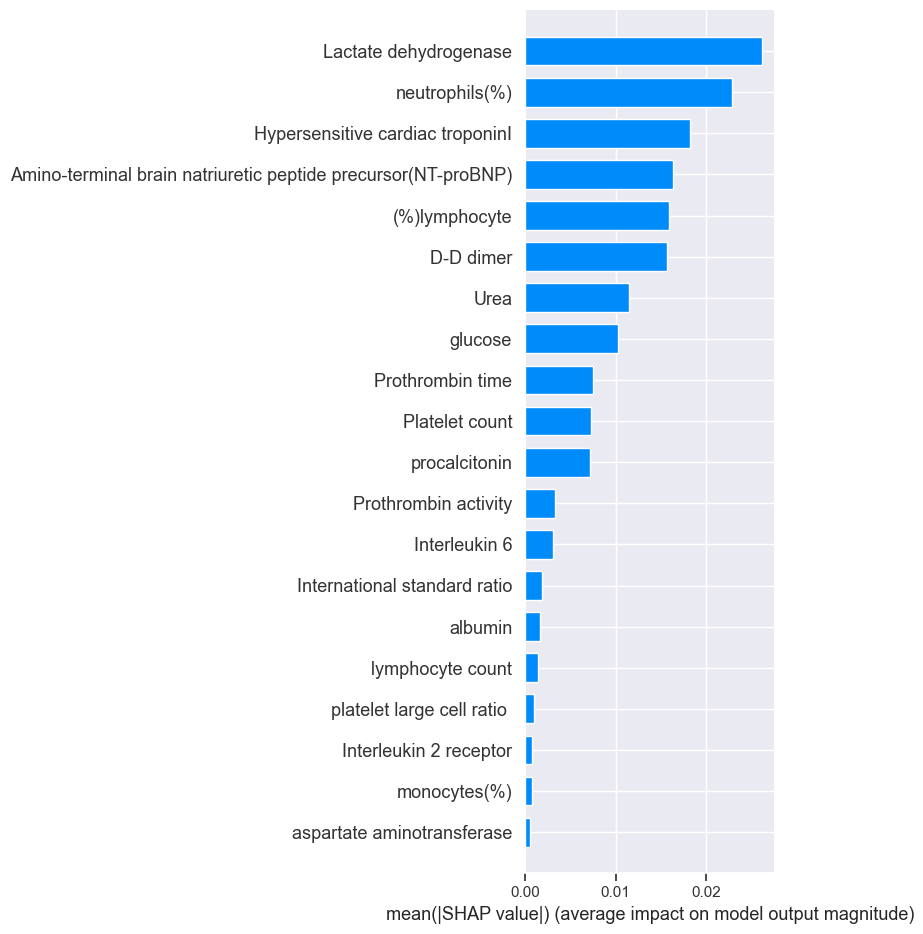

In [45]:
!pip install xgboost
!pip install shap

import xgboost
import shap
# load JS visualization code to notebook
shap.initjs()
# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(Xdata, label=Ydata), 100)
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xdata)
shap.summary_plot(shap_values, Xdata, plot_type="bar")

### Prediction using top 10 features from XGBoost feature selection model

In [46]:
fs = ['Lactate dehydrogenase','neutrophils(%)','High sensitivity C-reactive protein','Amino-terminal brain natriuretic peptide precursor(NT-proBNP)','(%)lymphocyte','D-D dimer','Urea','glucose','Prothrombin time','Platelet count','procalcitonin']
ts = ['outcome']
Xs = Xdata[fs]
Ys = Ydata[ts]
Xs.head()

Lactate dehydrogenase  neutrophils(%)  High sensitivity C-reactive protein  \
0                  340.0            82.4                                 51.5   
1                  340.0            65.8                                 51.5   
2                  306.0            82.4                                 43.1   
3                  340.0            82.4                                 51.5   
4                  340.0            82.4                                 51.5   

   Amino-terminal brain natriuretic peptide precursor(NT-proBNP)  \
0                                              585.0               
1                                              585.0               
2                                              585.0               
3                                              585.0               
4                                               60.0               

   (%)lymphocyte  D-D dimer   Urea  glucose  Prothrombin time  Platelet count  \
0          11.45      2.155  5.985     6.99              14.8           178.0   
1          22.60      2.155  5.985     6.99              14.8           105.0   
2          11.45      2.155  8.500     6.99              14.8           178.0   
3          11.45      2.200  5.985     6.99              13.9           178.0   
4          11.45      2.155  5.985     7.35              14.8           178.0   

   procalcitonin  
0           0.10  
1           0.10  
2           0.10  
3           0.10  
4           0.09

### Decision Tree, Random Forest and SVM model validation using Cross Validation

Decision Tree : 0.740033 (0.014732)
Support Vector Machines: 0.624510 (0.025699)
Random Forests : 0.756863 (0.015515)


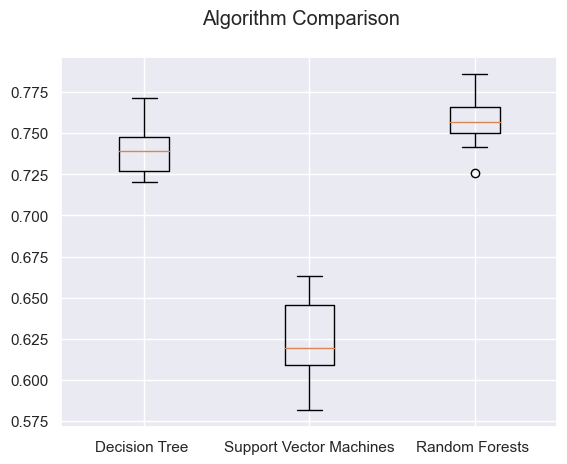

In [47]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Data
Xs = Xdata[fs]
Ys = Ydata[ts].values.ravel()
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []

models.append(('Decision Tree ', DecisionTreeClassifier()))
models.append(('Support Vector Machines', SVC()))
models.append(('Random Forests ', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model, Xs, Ys, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.bar(results,height=100)
plt.subplot()
ax.set_xticklabels(names)
plt.show()